In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import env

# 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

## - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.

## - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.

## - Only include properties that include a latitude and longitude value.

In [3]:
sql = '''
SELECT *
FROM properties_2017
JOIN (SELECT parcelid, max(logerror) as logerror, max(transactiondate) as transactiondate 
FROM predictions_2017 group by parcelid) as pred_17 using(parcelid) 
LEFT JOIN airconditioningtype using(airconditioningtypeid) 
LEFT JOIN architecturalstyletype using(architecturalstyletypeid) 
LEFT JOIN buildingclasstype using(buildingclasstypeid) 
LEFT JOIN heatingorsystemtype using(heatingorsystemtypeid) 
LEFT JOIN storytype using(storytypeid) 
LEFT JOIN typeconstructiontype using(typeconstructiontypeid) 
WHERE year(transactiondate) = 2017;
'''

In [4]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [5]:
df = pd.read_sql(sql, get_connection('zillow'))

df.head()

,typeconstructiontypeid,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,basementsqft,bathroomcnt,...,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,NaN,NaN,2.0,NaN,NaN,NaN,10711855,1087254,NaN,2.0,...,NaN,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,None,None
1,NaN,NaN,2.0,NaN,NaN,1.0,10711877,1072280,NaN,2.0,...,NaN,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,None,None
2,NaN,NaN,2.0,NaN,NaN,1.0,10711888,1340933,NaN,2.0,...,NaN,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,None,None
3,NaN,NaN,2.0,NaN,NaN,NaN,10711910,1878109,NaN,2.0,...,NaN,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,None,None
4,NaN,NaN,2.0,NaN,NaN,NaN,10711923,2190858,NaN,2.0,...,NaN,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,None,None


In [6]:
longindex = df.loc[df['longitude'].isin(['NaN'])].index


In [7]:
df.drop(longindex , inplace=True)


In [8]:
df.to_csv('zillow')

# 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [9]:
df.shape

(77380, 67)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77380 entries, 0 to 77412
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   typeconstructiontypeid        222 non-null    float64
 1   storytypeid                   50 non-null     float64
 2   heatingorsystemtypeid         49439 non-null  float64
 3   buildingclasstypeid           15 non-null     float64
 4   architecturalstyletypeid      206 non-null    float64
 5   airconditioningtypeid         24953 non-null  float64
 6   parcelid                      77380 non-null  int64  
 7   id                            77380 non-null  int64  
 8   basementsqft                  50 non-null     float64
 9   bathroomcnt                   77380 non-null  float64
 10  bedroomcnt                    77380 non-null  float64
 11  buildingqualitytypeid         49671 non-null  float64
 12  calculatedbathnbr             76771 non-null  float64
 13  d

In [11]:
list(df.columns)

['typeconstructiontypeid',
 'storytypeid',
 'heatingorsystemtypeid',
 'buildingclasstypeid',
 'architecturalstyletypeid',
 'airconditioningtypeid',
 'parcelid',
 'id',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


<AxesSubplot:>

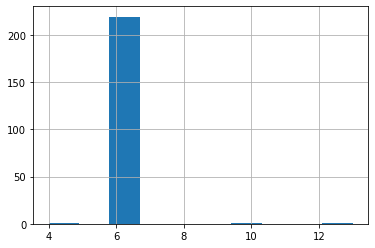

In [12]:
df.typeconstructiontypeid.hist()

<AxesSubplot:>

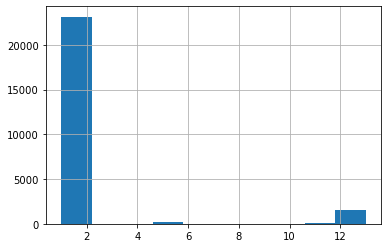

In [13]:
df.airconditioningtypeid.hist()

<AxesSubplot:>

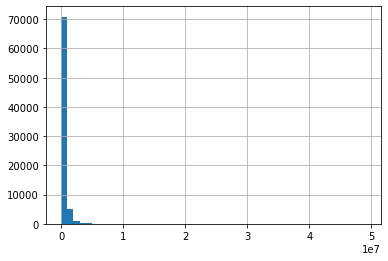

In [14]:
df.taxvaluedollarcnt.hist(bins = 50)

In [15]:
## possibly very strong outliers

<AxesSubplot:>

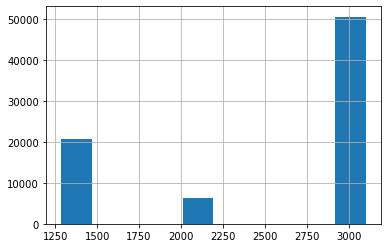

In [16]:
df.regionidcounty.hist()

In [17]:
df.isnull().sum()


typeconstructiontypeid      77158
storytypeid                 77330
heatingorsystemtypeid       27941
buildingclasstypeid         77365
architecturalstyletypeid    77174
                            ...  
architecturalstyledesc      77174
buildingclassdesc           77365
heatingorsystemdesc         27941
storydesc                   77330
typeconstructiondesc        77158
Length: 67, dtype: int64

# 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

# 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [18]:
def missing_value_table(df):
    '''
    This function will take in a dataframe and will return a report detailing missing values in
    the dataframes various columns
    '''
    
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " +  str((mz_table['null_count'] != 0).sum()) +
          " columns that have NULL values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)

    return mz_table



In [20]:
missing_value_table(df)

Your selected dataframe has 67 columns and 77380 Rows.
There are 52 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
buildingclasstypeid,0,77365,100.0,77365,100.0,float64
buildingclassdesc,0,77365,100.0,77365,100.0,object
finishedsquarefeet13,0,77339,99.9,77339,99.9,float64
storydesc,0,77330,99.9,77330,99.9,object
basementsqft,0,77330,99.9,77330,99.9,float64
...,...,...,...,...,...,...
bedroomcnt,830,0,0.0,830,1.1,float64
roomcnt,59807,0,0.0,59807,77.3,float64
assessmentyear,0,0,0.0,0,0.0,float64
bathroomcnt,592,0,0.0,592,0.8,float64


## Prepare

# 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [21]:
df.propertylandusetypeid.value_counts()

## anything below 250 is either multi unit or commercial, should be removed 

261.0    52319
266.0    19294
246.0     2009
269.0     1944
248.0      727
247.0      535
265.0      333
263.0       74
275.0       58
260.0       37
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

In [23]:
cleanpropindexes250 = df.loc[df['propertylandusetypeid'] <= 250].index

df.drop(cleanpropindexes250 , inplace=True)

In [25]:
df.shape

(74094, 67)

In [24]:
df.unitcnt.value_counts()

## multi unit homes still need to be removed 

1.0    47262
2.0       33
3.0        3
4.0        2
6.0        1
Name: unitcnt, dtype: int64

In [28]:
singlecountindexes = df.loc[df['unitcnt'] > 1].index

df.drop(singlecountindexes , inplace=True)

In [29]:
df.shape

(74055, 67)

In [26]:
df.unitcnt.isnull().value_counts()

False    47301
True     26793
Name: unitcnt, dtype: int64

In [27]:
## there are way too many nulls, but they are likely homes, they should be filled in with a 1

In [30]:
df["unitcnt"].fillna( 1 , inplace = True)

In [31]:
df.unitcnt.isnull().value_counts()

False    74055
Name: unitcnt, dtype: int64

# 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

## The input:
#### - A dataframe
#### - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
#### - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

## The output:
#### - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [32]:
def handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [34]:
df = handle_missing_values(df)

In [35]:
df.shape

(74055, 33)